(1) 데이터 가져오기
(2) 모델에 입력할 데이터 X 준비하기
(3) 모델에 예측할 데이터 y 준비하기
(4) train 데이터와 test 데이터로 분리하기
(5) 모델 준비하기
(6) 손실함수 loss 정의하기
(7) 기울기를 구하는 gradient 함수 구현하기
(8) 하이퍼 파라미터인 학습률 설정하기
(9) 모델 학습하기
(10) test 데이터에 대한 성능 확인하기
(11) 정답 데이터와 예측한 데이터 시각화하기

### 1. 데이터 가져오기

 - sklearn.datasets의 load_diabetes.
 - diabetes의 data를 df_X에, target을 df_y에 저장

In [156]:
import sklearn.datasets as datasets
import seaborn as sns
import pandas as pd

data=datasets.load_diabetes()

df_X=data['data']
df_y=data['target']

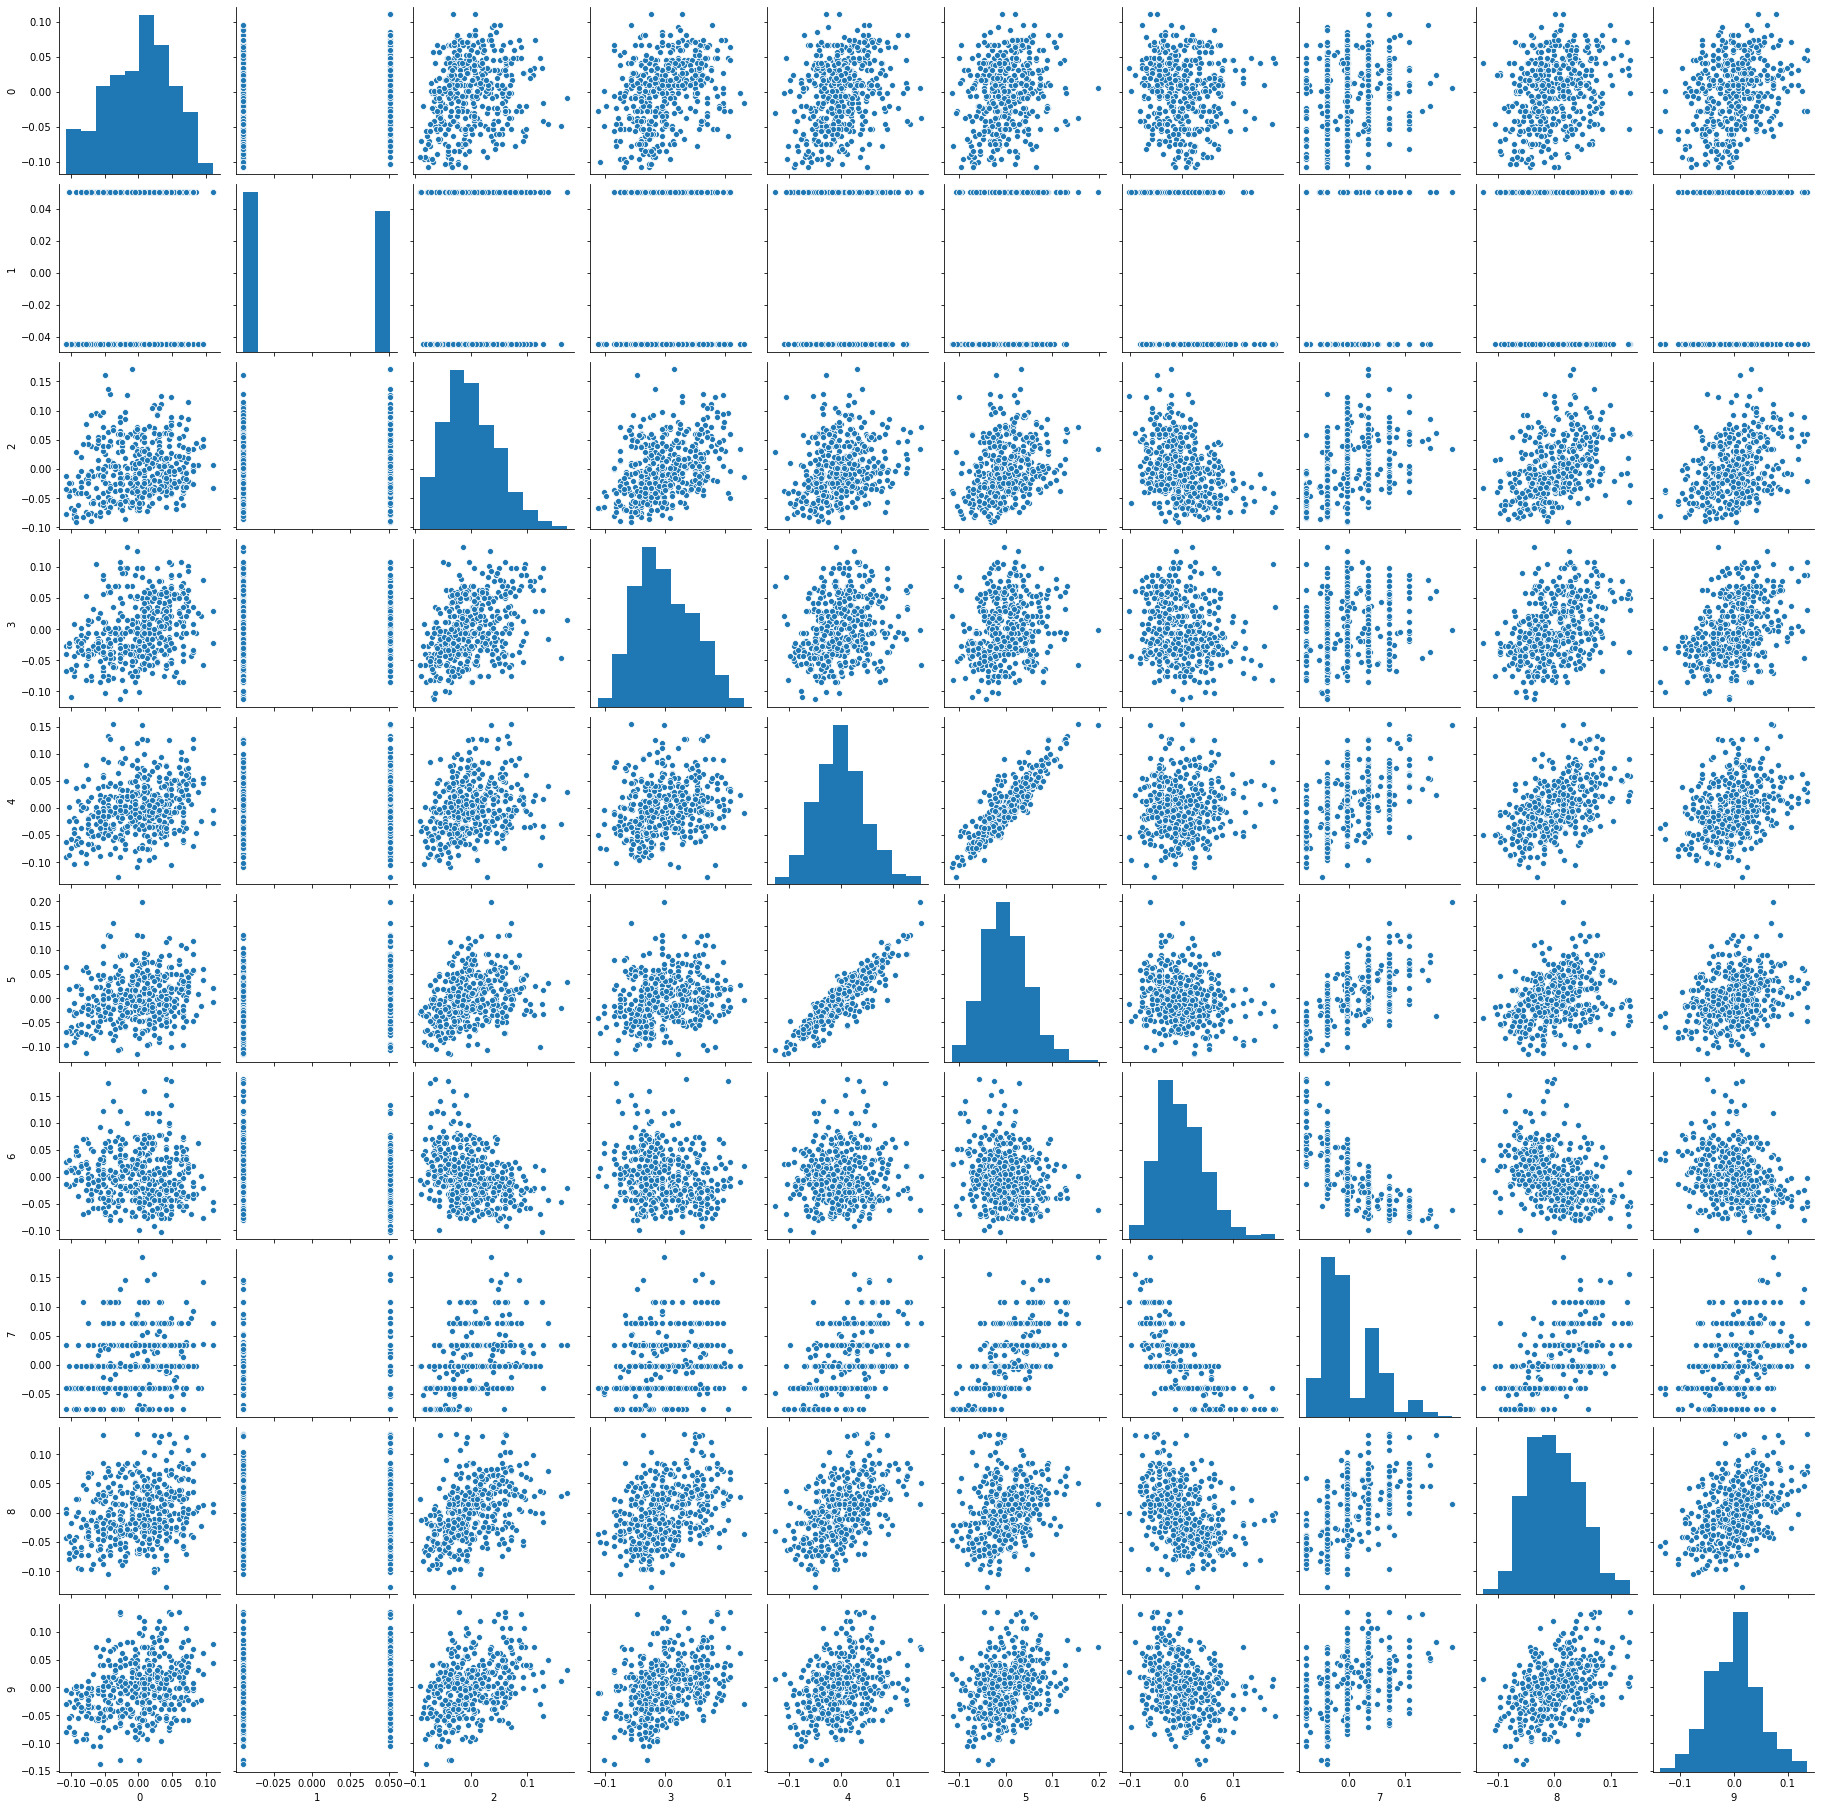

In [200]:
'''
df_data=df_X
df_data['target']=data['target']
data_pd=pd.DataFrame(train)
'''

sns.pairplot(data_pd)

In [160]:
type(df_X)

numpy.ndarray

### 2. 모델에 입력할 데이터 x 준비하기, 모델에 예측할 데이터 y 준비하기

 - df_X에 있는 값들을 numpy array로 변환해서 저장
 - df_y에 있는 값들을 numpy array로 변환해서 저장
 
 - X와 y 데이터를 각각 train 데이터와 test 데이터로 분리

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

df_X=np.array(df_X)
df_y=np.array(df_y)

train_X,test_X,train_y,test_y=train_test_split(df_X,df_y,test_size=0.2,random_state=15)

### 3.모델 준비하기

 - 입력 데이터 개수에 맞는 가중치 W와 b를 준비
 - 모델 함수를 구현

In [169]:
w=np.random.rand(10)
b=np.random.rand()

def model(X,w,b):
    y=0
    for i in range(10):
        y +=X[:,i] * w[i]
    y +=b
    
    return y



In [190]:
a=sum(train_X[0]*w) +b
a

116.73449463118388

In [191]:
y=0
for i in range(10):
   y +=train_X[0][i] * w[i] 
y+=b
y

116.73449463118388

In [193]:
train_X.shape

(353, 10)

### 4. 손실함수 정의
 - 손실함수를 MSE 함수

In [124]:
def MSE(y,y_pred):
    mse=((y-y_pred)**2).mean()
    return mse
    
def loss_mse(X,W,b,y):
    prediction=model(X,W,b)
    loss = MSE(prediction,y)
    return loss

### 5. 기울기 구하는 Gradient 함수 구현

In [125]:
def gradient(X,W,b,y):
    
    N=len(W)
    y_pred=model(X,W,b)
    
    dw=1/N * 2* X.T.dot(y_pred-y)
    db=2 * (y_pred - y).mean()
    
    
    return dw,db

In [126]:
'''
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

'''

'\ndef gradient(x, w, b, y):\n    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001\n    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001\n    return dw, db\n\ndef gradient(X, W, b, y):\n    # N은 가중치의 개수\n    N = len(W)\n    \n    # y_pred 준비\n    y_pred = model(X, W, b)\n    \n    # 공식에 맞게 gradient 계산\n    dW = 1/N * 2 * X.T.dot(y_pred - y)\n        \n    # b의 gradient 계산\n    db = 2 * (y_pred - y).mean()\n    return dW, db\n\n'

### 6. 하이퍼 파라미터 Learning rate 설정


In [170]:
learning_rate=0.01

### 7. 모델 학습하기

- 정의된 손실함수와 기울기 함수로 모델을 학습
- loss값이 충분히 떨어질 때까지 학습을 진행.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 OK. 다양한 데이터로 실험

In [171]:
losses=[]
for i in range(10001):
    dw, db = gradient(train_X,w,b,train_y)
    w=w - (dw * learning_rate)
    b=b - (db * learning_rate)
    loss=loss_mse(train_X,w,b,train_y)
    losses.append(loss)
    if i % 10 ==0:
        print("iteration %d : Loss %0.4f" % (i,loss))
    

iteration 0 : Loss 27948.5219
iteration 10 : Loss 20387.3079
iteration 20 : Loss 15282.6397
iteration 30 : Loss 11823.6466
iteration 40 : Loss 9468.3789
iteration 50 : Loss 7854.4765
iteration 60 : Loss 6739.5305
iteration 70 : Loss 5961.2642
iteration 80 : Loss 5410.9462
iteration 90 : Loss 5015.6358
iteration 100 : Loss 4726.3268
iteration 110 : Loss 4510.0271
iteration 120 : Loss 4344.4674
iteration 130 : Loss 4214.5655
iteration 140 : Loss 4110.0619
iteration 150 : Loss 4023.9395
iteration 160 : Loss 3951.3647
iteration 170 : Loss 3888.9792
iteration 180 : Loss 3834.4248
iteration 190 : Loss 3786.0242
iteration 200 : Loss 3742.5664
iteration 210 : Loss 3703.1623
iteration 220 : Loss 3667.1465
iteration 230 : Loss 3634.0115
iteration 240 : Loss 3603.3616
iteration 250 : Loss 3574.8826
iteration 260 : Loss 3548.3199
iteration 270 : Loss 3523.4637
iteration 280 : Loss 3500.1381
iteration 290 : Loss 3478.1940
iteration 300 : Loss 3457.5032
iteration 310 : Loss 3437.9547
iteration 320 :

iteration 4830 : Loss 2936.5500
iteration 4840 : Loss 2936.5348
iteration 4850 : Loss 2936.5196
iteration 4860 : Loss 2936.5044
iteration 4870 : Loss 2936.4892
iteration 4880 : Loss 2936.4741
iteration 4890 : Loss 2936.4590
iteration 4900 : Loss 2936.4439
iteration 4910 : Loss 2936.4288
iteration 4920 : Loss 2936.4137
iteration 4930 : Loss 2936.3986
iteration 4940 : Loss 2936.3836
iteration 4950 : Loss 2936.3686
iteration 4960 : Loss 2936.3536
iteration 4970 : Loss 2936.3386
iteration 4980 : Loss 2936.3236
iteration 4990 : Loss 2936.3087
iteration 5000 : Loss 2936.2938
iteration 5010 : Loss 2936.2788
iteration 5020 : Loss 2936.2639
iteration 5030 : Loss 2936.2491
iteration 5040 : Loss 2936.2342
iteration 5050 : Loss 2936.2193
iteration 5060 : Loss 2936.2045
iteration 5070 : Loss 2936.1897
iteration 5080 : Loss 2936.1749
iteration 5090 : Loss 2936.1601
iteration 5100 : Loss 2936.1454
iteration 5110 : Loss 2936.1306
iteration 5120 : Loss 2936.1159
iteration 5130 : Loss 2936.1011
iteratio

iteration 8970 : Loss 2931.2340
iteration 8980 : Loss 2931.2229
iteration 8990 : Loss 2931.2117
iteration 9000 : Loss 2931.2006
iteration 9010 : Loss 2931.1895
iteration 9020 : Loss 2931.1783
iteration 9030 : Loss 2931.1672
iteration 9040 : Loss 2931.1561
iteration 9050 : Loss 2931.1450
iteration 9060 : Loss 2931.1339
iteration 9070 : Loss 2931.1228
iteration 9080 : Loss 2931.1117
iteration 9090 : Loss 2931.1006
iteration 9100 : Loss 2931.0895
iteration 9110 : Loss 2931.0785
iteration 9120 : Loss 2931.0674
iteration 9130 : Loss 2931.0563
iteration 9140 : Loss 2931.0453
iteration 9150 : Loss 2931.0342
iteration 9160 : Loss 2931.0232
iteration 9170 : Loss 2931.0122
iteration 9180 : Loss 2931.0011
iteration 9190 : Loss 2930.9901
iteration 9200 : Loss 2930.9791
iteration 9210 : Loss 2930.9681
iteration 9220 : Loss 2930.9571
iteration 9230 : Loss 2930.9461
iteration 9240 : Loss 2930.9351
iteration 9250 : Loss 2930.9241
iteration 9260 : Loss 2930.9131
iteration 9270 : Loss 2930.9022
iteratio

### 8. Test 데이터에 대한 성능 확인 및 정답 데이터와 예측 데이터 시각화

 -x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화

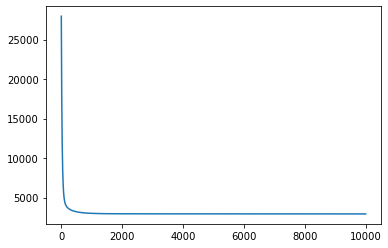

In [172]:
import matplotlib.pylab as plt
plt.plot(losses)

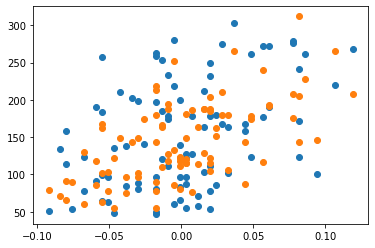

In [188]:
predctions=model(test_X,w,b)
plt.scatter(test_X[:,9],test_y)
plt.scatter(test_X[:,9],predctions, label='pred')